In [ ]:
import os
import pandas as pd
import github_scraper as gs
saved_searches = os.listdir("./saved_searches")
filename = saved_searches[0]

code_extensions_coulmn_name_dict = {
    '.py': 'Python',
    '.r': 'R',
    '.java': 'Java',
    '.js': 'JavaScript',
    '.go': 'Go',
    '.c': 'C',
    '.cpp': 'C++',
    '.cs': 'C#',
}
code_extensions = '.py', '.r', '.java', '.js', '.go', '.c', '.cpp', '.cs'
filepath = f'./saved_searches/{filename}'
df = pd.read_csv(filepath)
g = gs.authenticate()
i = 0


In [ ]:
i=0
for row in df.iterrows():
    repo_name = row[1]['name']
    repo_owner = row[1]['owner']
    repo = f"{repo_owner}/{repo_name}"
    print(i, repo)
    contents = gs.get_repo_contents(g, repo)
    for code_ext in code_extensions:
        col_name = code_extensions_coulmn_name_dict[code_ext]
        code_contents = gs.filter_code_files(contents, code_extensions=(code_ext,))
        code_files_dict = {}
        for code_file in code_contents:
            raw_content = gs.get_code_contents(code_file)
            code_filename = code_file.name
            code_files_dict[code_filename] = raw_content
        df.at[i, col_name] = str(code_files_dict)
    i += 1
    if i == 4:
        break

In [ ]:
contents

In [ ]:
i = 0
for c in  contents:
    print(i, c.name)
    i += 1

In [ ]:
contents[8].type

In [ ]:
repo

In [ ]:
contents[9].path, contents[9].type

In [ ]:
repo.get_contents(contents[9].path)

In [ ]:
contents.extend()

In [ ]:
df.head()

In [1]:
eval ('[1,2,3]')

[1, 2, 3]

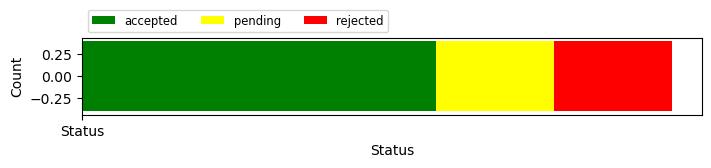

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Status': ['accepted', 'pending', 'rejected', 'accepted', 'accepted']}
df = pd.DataFrame(data)

# Count the occurrences of each status
status_counts = df['Status'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 1))
colors = ['green', 'yellow', 'red']
labels = ['accepted', 'pending', 'rejected']

# Create a bar segment for each status
for i, (status, count) in enumerate(status_counts.items()):
    ax.barh(0, count, left=status_counts[:i].sum(), color=colors[i], label=status)

# Customize the plot
ax.set_xticks([0])
ax.set_xticklabels(['Status'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

#Add legend to the right of the plot
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='small')

# Show the plot
plt.show()


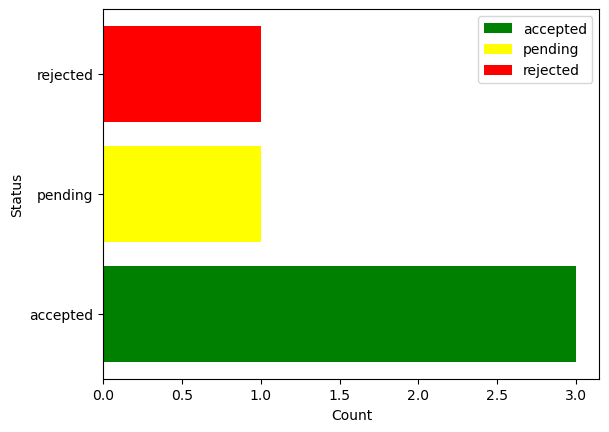

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Status': ['accepted', 'pending', 'rejected', 'accepted', 'accepted']}
df = pd.DataFrame(data)

# Count the occurrences of each status
status_counts = df['Status'].value_counts()

# Create a horizontal bar plot with flipped axes
fig, ax = plt.subplots()

# Create a bar segment for each status
colors = ['green', 'yellow', 'red']
labels = ['accepted', 'pending', 'rejected']
for i, (status, count) in enumerate(status_counts.items()):
    ax.barh(status, count, color=colors[i], label=status)

# Customize the plot
ax.set_yticks(status_counts.index)
ax.set_xlabel('Count')
ax.set_ylabel('Status')
ax.legend(loc='upper right')

# Show the plot
plt.show()


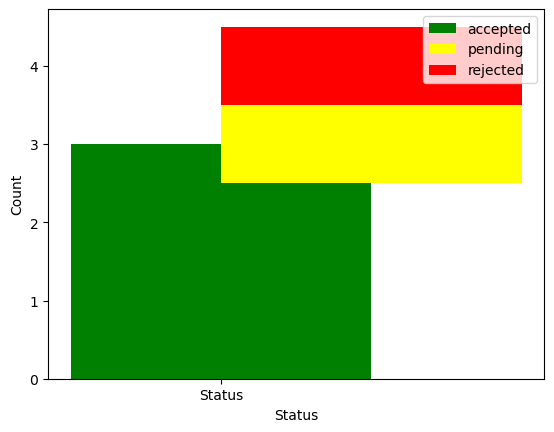

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Status': ['accepted', 'pending', 'rejected', 'accepted', 'accepted']}
df = pd.DataFrame(data)

# Count the occurrences of each status
status_counts = df['Status'].value_counts()

# Create a stacked bar plot
fig, ax = plt.subplots()

# Extract the data for plotting
categories = status_counts.index
counts = status_counts.values

# Create a single bar with stacked segments
colors = ['green', 'yellow', 'red']
ax.bar(0, counts[0], color=colors[0], label=categories[0])
for i in range(1, len(categories)):
    ax.bar(0, counts[i], color=colors[i], label=categories[i], bottom=sum(counts[:i]), orientation='horizontal')

# Customize the plot
ax.set_xticks([0])
ax.set_xticklabels(['Status'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.legend(loc='upper right')


# Show the plot
plt.show()
